In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('C:/Users/anton/git_repository/Exercise03')
import task3 as f

In [3]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = f.load_mnist_data()


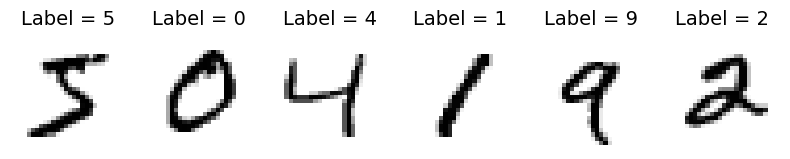

x_train shape: (60000, 784)
x_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)
60000 train samples
10000 test samples


In [4]:
# Visualisation of the first six images in x_train
plt.figure(figsize=(8, 2))
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray_r") # resizes the images to 28x28 pixels
    plt.title('Label = %d' % y_train[i], fontsize=14) # displays the images along with their corresponding labels from y_train
    plt.axis("off")
plt.tight_layout()
plt.show()


# Visualisation of the shapes of the training and test data
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [5]:

data_shape = 784  # shape of the data (28x28=784)
latent_dim = 2  # dimension of the latent space

batch_size = 128  # batch size for training, to be changed later

# Create vae model
model, encoder, decoder = f.VAE(data_shape, latent_dim)


The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'decoder_stddev:0' shape=(784,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [6]:
# Train the VAE and collect loss values at specific epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True) # Stop training when the validation loss is no longer improving ie convergence is reached

history = model.fit(
    x_train,
    epochs=100,
    batch_size=batch_size,
    validation_data=(x_test, None),
    verbose=1,
    callbacks=[early_stopping]
)
if early_stopping.stopped_epoch != 0:
    print("Convergence reached at epoch", early_stopping.stopped_epoch + 1)
else:
    print("Training ran for ", len(history.history['loss']) ," epochs without early stopping")

Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 3125.5486 - val_loss: 2539.2700
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 2460.7815 - val_loss: 2341.8406
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 2308.5293 - val_loss: 2236.4402
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 2223.6104 - val_loss: 2175.9036
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 2171.2974 - val_loss: 2126.1914
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 2134.2134 - val_loss: 2104.4092
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 2104.9521 - val_loss: 2091.2231
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 2083.7549 - val_loss: 2060.9824
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 2064.9429 - val_loss: 2045.7211
Epoch 10/100
469/469 [==============

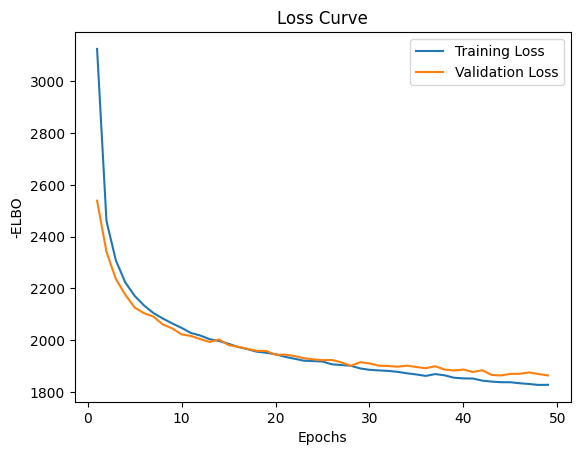

In [7]:
# Plotting the loss curve (training + test set), i.e., epoch vs. −LELBO (Q4)

    #Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

    #Plot loss curve
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('-ELBO')
plt.title('Loss Curve')
plt.legend()
plt.show()

Epoch: 1, Loss: 3125.548583984375
79/79 [==============================] - 0s 2ms/step


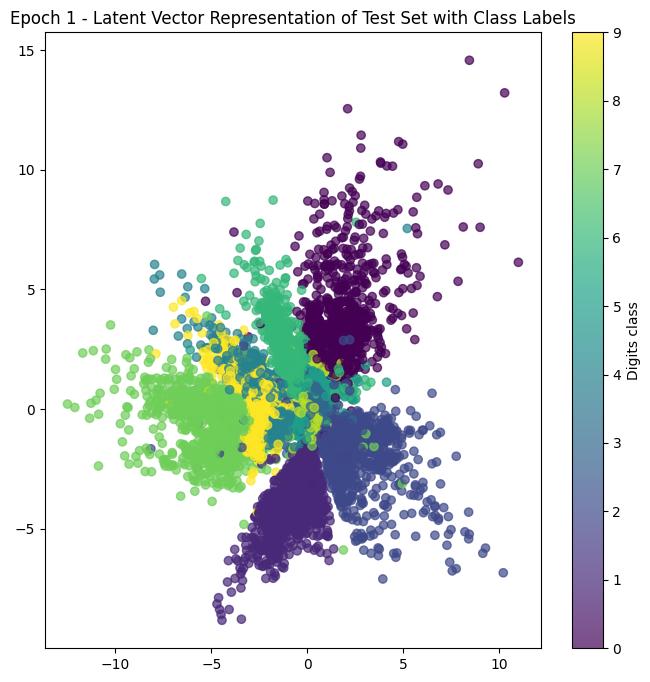

1/1 [==============================] - 0s 103ms/step


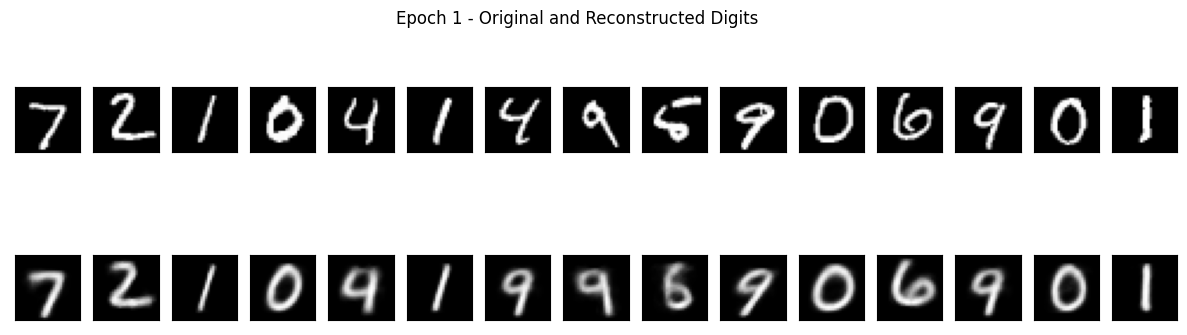

1/1 [==============================] - 0s 46ms/step


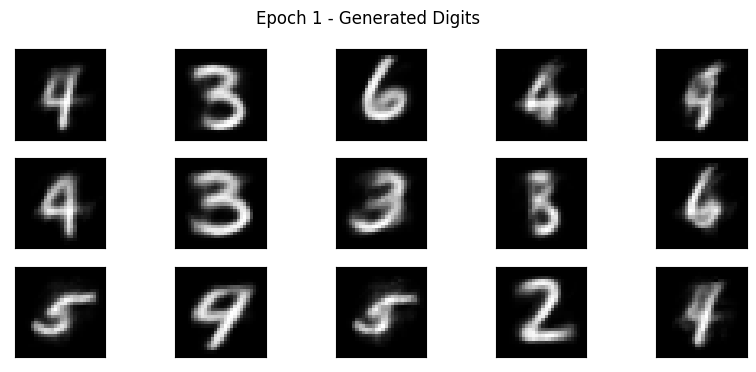

Epoch: 5, Loss: 2171.29736328125
79/79 [==============================] - 0s 2ms/step


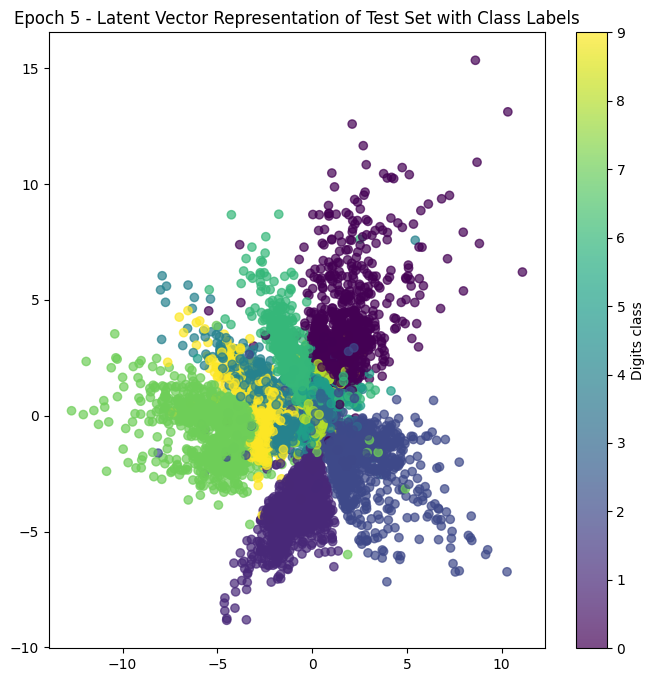

1/1 [==============================] - 0s 37ms/step


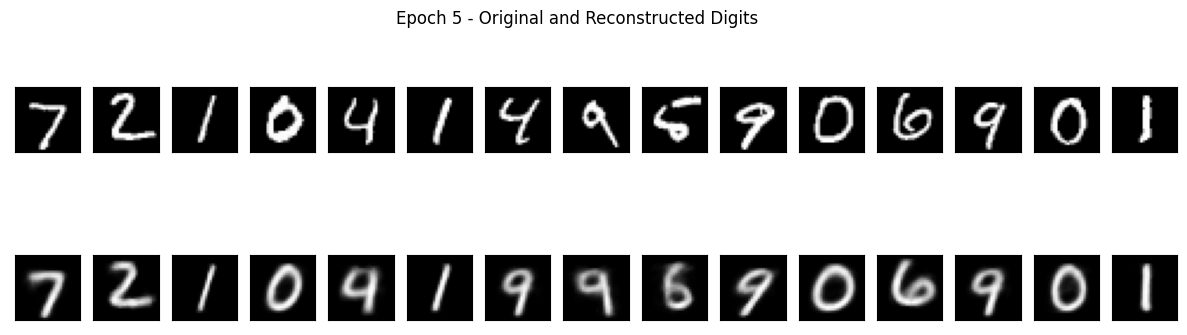

1/1 [==============================] - 0s 23ms/step


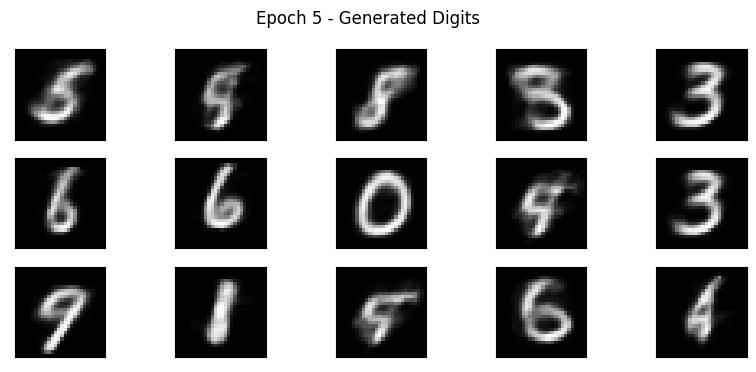

Epoch: 25, Loss: 1917.582763671875
79/79 [==============================] - 0s 3ms/step


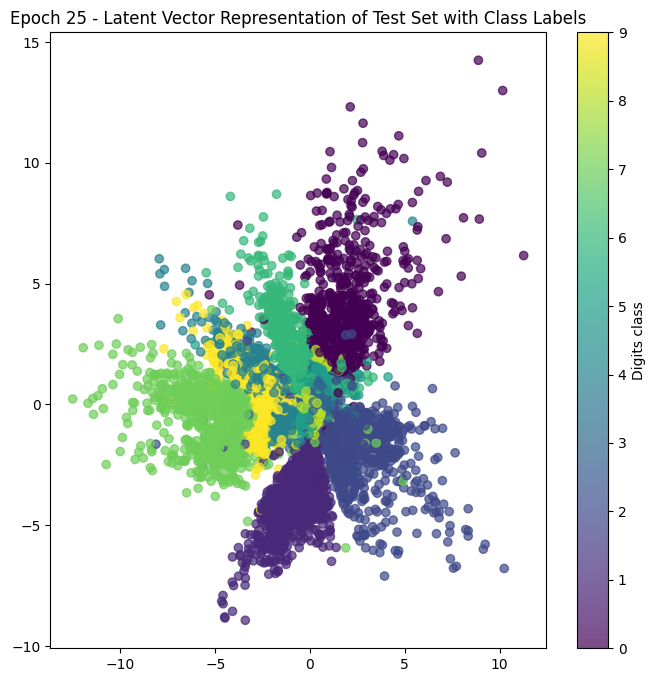

1/1 [==============================] - 0s 12ms/step


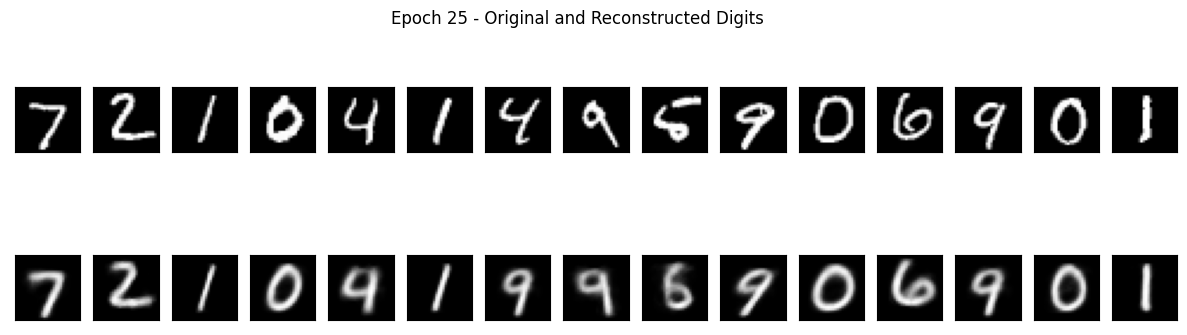

1/1 [==============================] - 0s 21ms/step


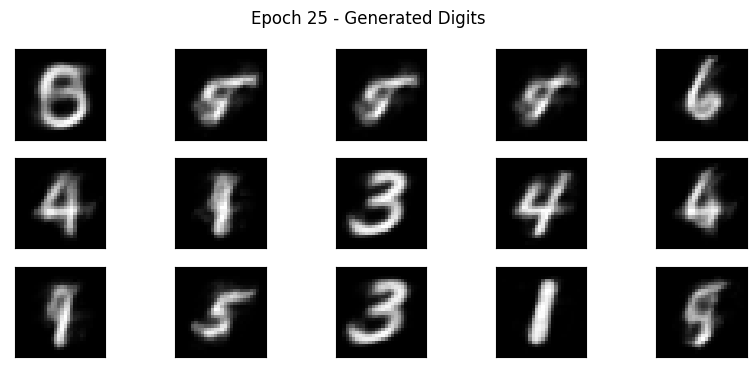

In [9]:
# Plotting the different figures for the specified epochs (Q3)

epochs_list = [1, 5, 25, 50]  # Epochs for experiments

for epoch in epochs_list : # Save the state of the model at the specified epochs
    
    if epoch <= early_stopping.stopped_epoch + 1:

        loss_value = history.history['loss'][epoch - 1]  # -1 to account for 0-based indexing
        print(f"Epoch: {epoch}, Loss: {loss_value}")

        # Plotting the latent vector representation of a few batches of data : encode the test set and mark the different classes 
        x_test_encoded = encoder.predict(x_test, batch_size=batch_size)[2]

        plt.figure(figsize=(8, 8))
        scatter = plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test, cmap='viridis', alpha=0.7)
        plt.colorbar(scatter, label='Digits class')
        plt.title(f"Epoch {epoch} - Latent Vector Representation of Test Set with Class Labels")
        plt.show()

        # Plotting some of the reconstructed digits from the latent space (15) and the corresponding original ones 
        reconstructed_images = model.predict(x_test[:15]) # Generate 15 reconstructed images

        plt.figure(figsize=(15, 4))

        for i in range(15):
            # Original images
            ax = plt.subplot(2, 15, i + 1)
            plt.imshow(x_test[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # Reconstructed images
            ax = plt.subplot(2, 15, i + 16)
            plt.imshow(reconstructed_images[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.suptitle(f"Epoch {epoch} - Original and Reconstructed Digits")
        plt.show()

        # Plotting some of the generated digits (15) 
        random_samples = np.random.normal(size=(15, latent_dim)) # Generate 15 samples from the prior distribution
        generated_images = decoder.predict(random_samples) # Generate 15 generated images, decoded from the latent space

        plt.figure(figsize=(10, 4))
        for i in range(15):
            ax = plt.subplot(3, 5, i + 1)
            plt.imshow(generated_images[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.suptitle(f"Epoch {epoch} - Generated Digits")
        plt.show()

    else : # Stop plotting if convergence is reached
        break